# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [15]:
import pandas as pd
import sqlite3
sqlite_db = '../../assets/datasets/adult.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()
results = c.execute('SELECT * FROM adult')
fetched = results.fetchall()
df = pd.DataFrame(fetched)
df.head()

0                 1       2          3   4                   5   \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                  6              7      8       9     10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [39]:
df.info()
print '\n', 'Yes, there are close to 1000 missing values in column 13.  I think I\'ll replace them w/ the most common value.'
print 'There are also missing values in columns 1 and 6, which I will treat the same as column 13.'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
salary            48842 non-null object
target            48842 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 5.6+ MB

Yes, there are close to 1000 missing values in column 13.  I think I'll replace them w/ the most common value.
There are also missing values in columns 1 and 6, which I will treat the same as column 

In [28]:
df[1].fillna('Private', inplace=True)
df[6].fillna('Prof-specialty', inplace=True)
df[13].fillna('United-States', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
0     48842 non-null int64
1     48842 non-null object
2     48842 non-null int64
3     48842 non-null object
4     48842 non-null int64
5     48842 non-null object
6     48842 non-null object
7     48842 non-null object
8     48842 non-null object
9     48842 non-null object
10    48842 non-null int64
11    48842 non-null int64
12    48842 non-null int64
13    48842 non-null object
14    48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [31]:
listy = []
for i in df[14]:
    if i == '>50K':
        listy.append(True)
    else:
        listy.append(False)
df['target'] = listy
df.head()

0                 1       2          3   4                   5  \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                   6              7      8       9    10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14 target  
0  United-States  <=50K  False  
1  United-States  <=50K  False  
2  United-States  <=50K  False  
3  United-States  <=50K  False  
4           Cuba  <=50K  False

In [34]:
# Tired of column names...
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                    'native_country', 'salary', 'target']
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary target  
0          2174             0              40  United-States  <=50K  False  
1             0             0              13  United-States  <=50K  False  
2             0             0              40  United-States  <=50K  False  
3             0             0              40  United-States  <=50K  False  
4             0             0              40           Cuba  <=50K  False

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

In [37]:
df.info()
print '\n', 'age, fnlwgt, education_num, capital_gain, capital_loss, and hours_per_week are all numerical.'
print 'The rest are categorical.'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
salary            48842 non-null object
target            48842 non-null bool
dtypes: bool(1), int64(6), object(9)
memory usage: 5.6+ MB

age, fnlwgt, education_num, capital_gain, capital_loss, and hours_per_week are all numerical.
The rest are categorical.


> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

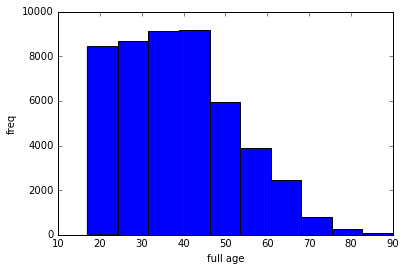

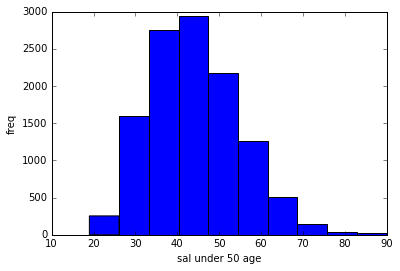

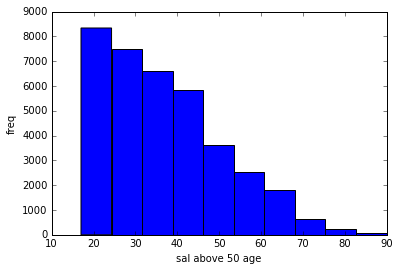

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['age'])
plt.xlabel('full age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == True]['age'])
plt.xlabel('sal under 50 age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == False]['age'])
plt.xlabel('sal above 50 age')
plt.ylabel('freq')
plt.show()

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

In = salary above 50k, Out = salary below 50k


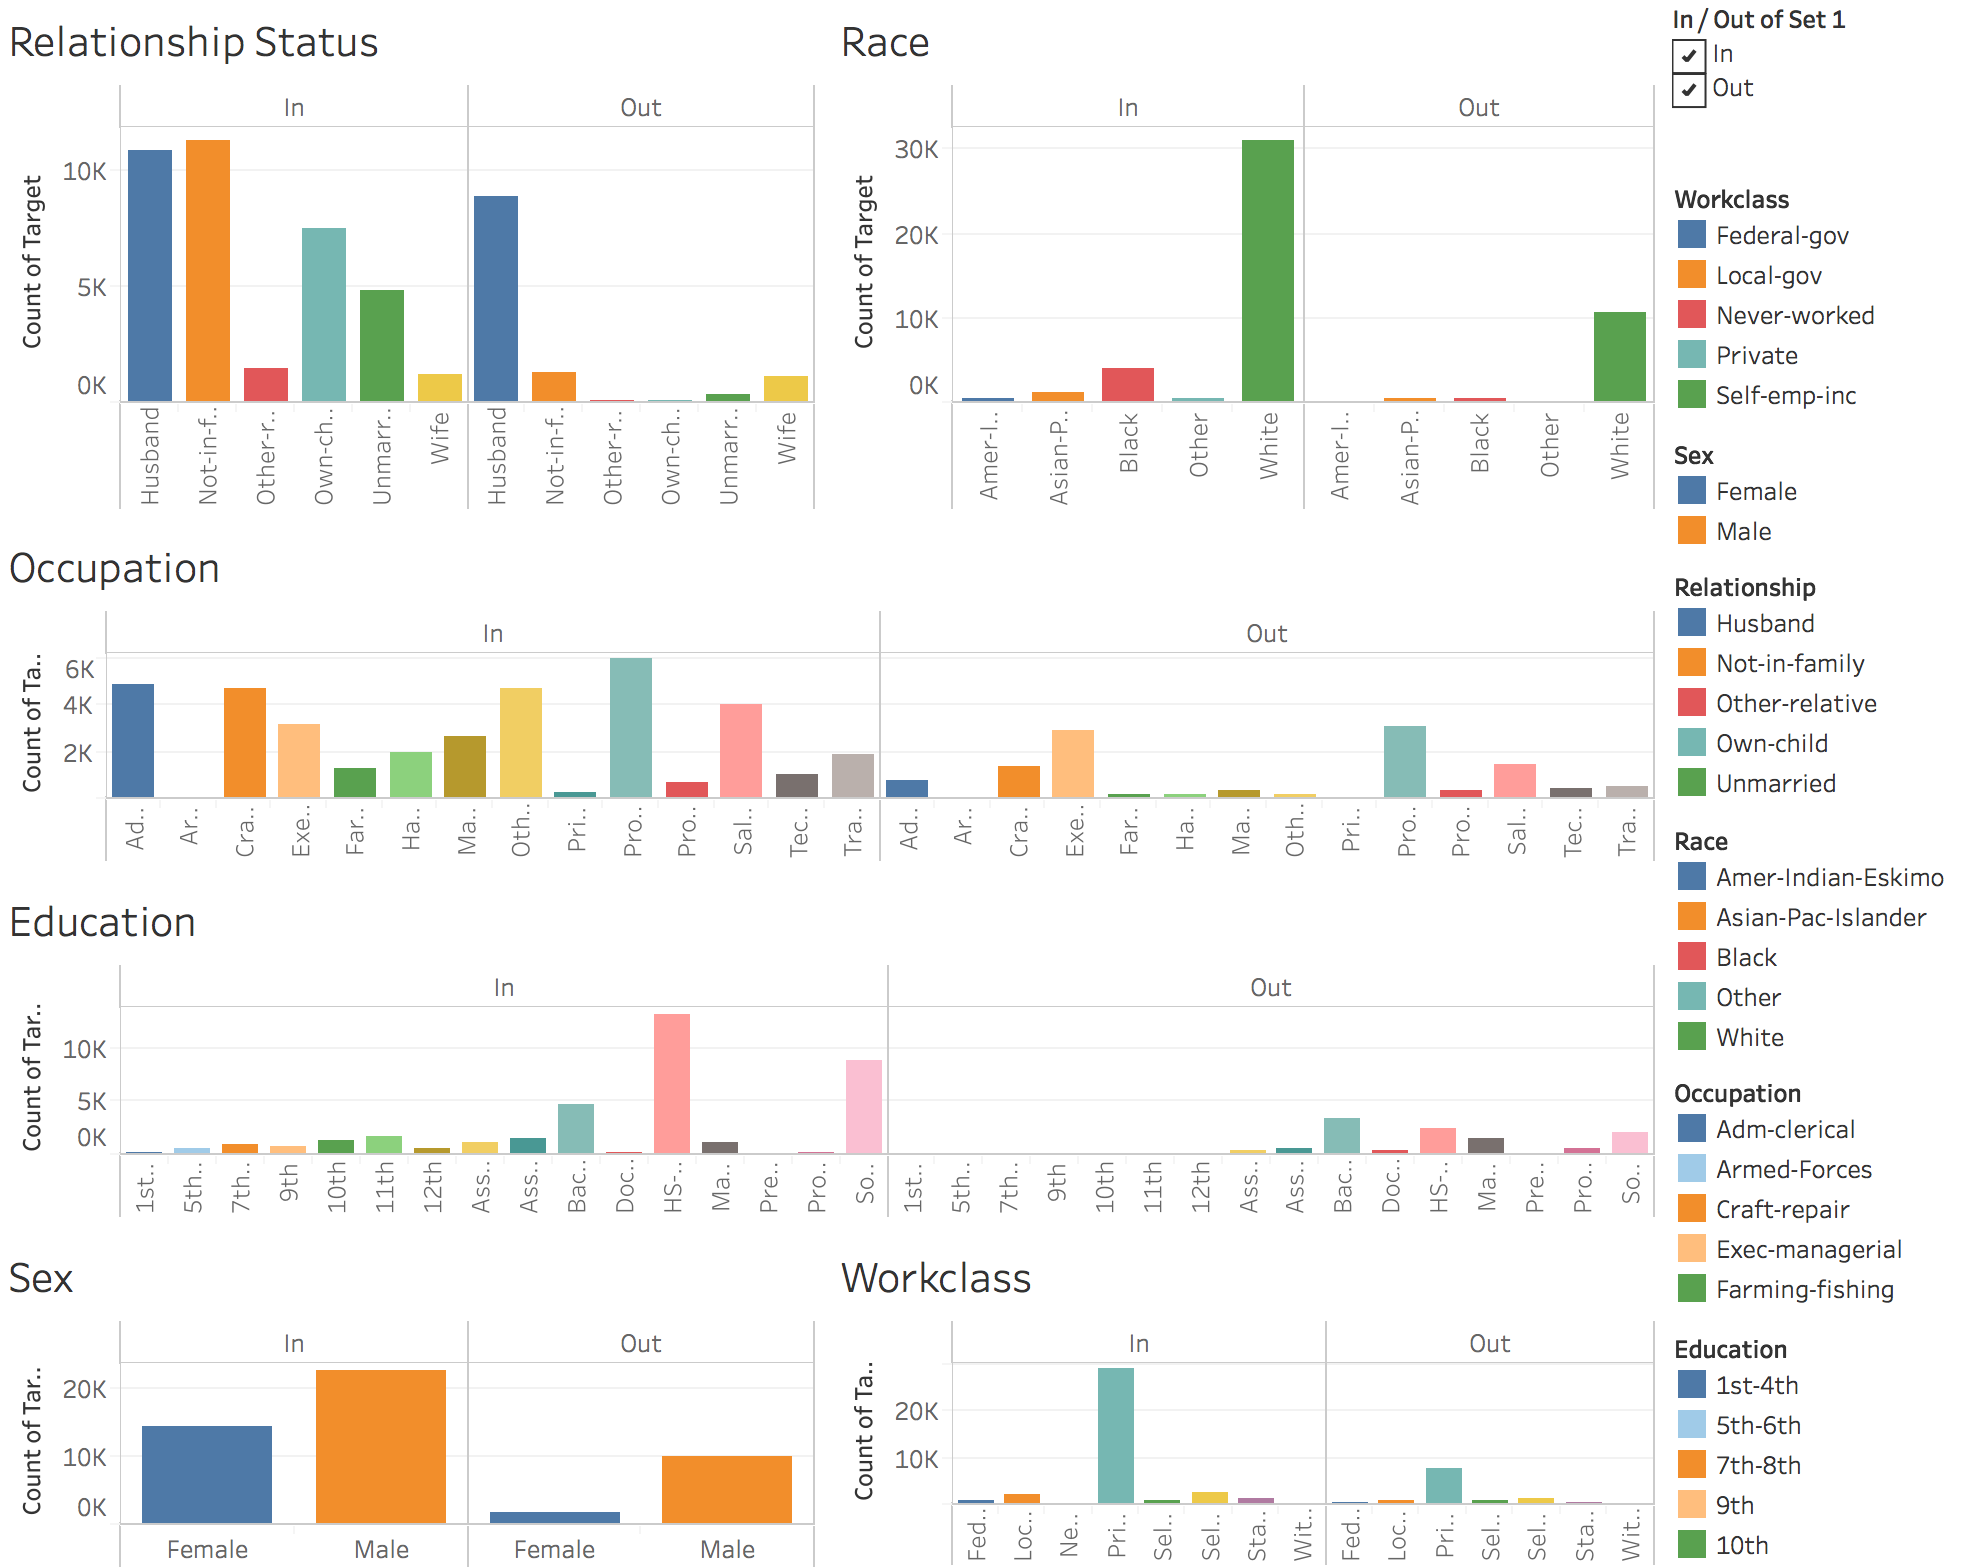

In [220]:
# I decided to do this part in Tableau
from IPython.display import Image 
print 'In = salary above 50k, Out = salary below 50k'
Image(filename='stuff_by_salary.png')


In [216]:
df.to_csv('thing.csv')

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

In [113]:
print 'There do not seem to be any patterns between the two salary groups in any of the numerical categories.'

There do not seem to be any patterns between the two salary groups in any of the numerical categories.


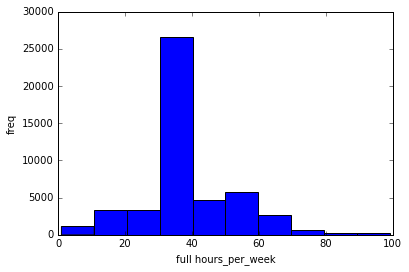

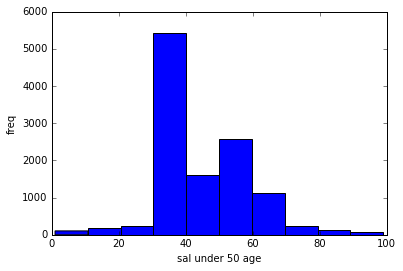

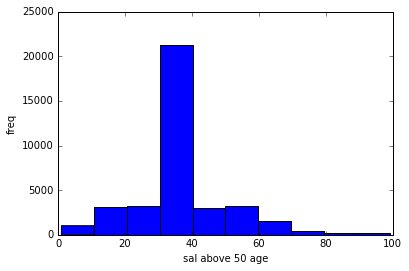

In [112]:
plt.hist(df['hours_per_week'])
plt.xlabel('full hours_per_week')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == True]['hours_per_week'])
plt.xlabel('sal under 50 age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == False]['hours_per_week'])
plt.xlabel('sal above 50 age')
plt.ylabel('freq')
plt.show()

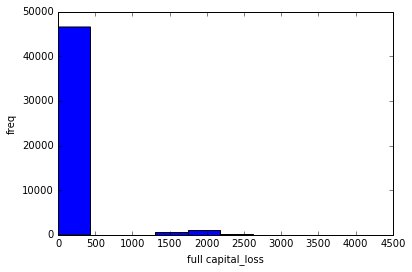

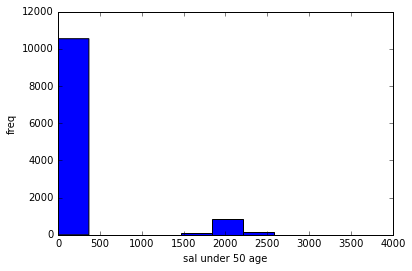

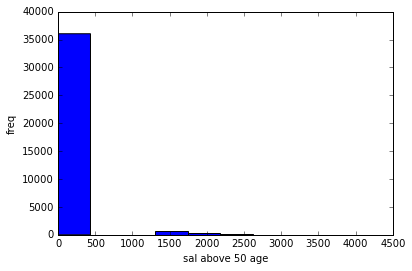

In [111]:
plt.hist(df['capital_loss'])
plt.xlabel('full capital_loss')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == True]['capital_loss'])
plt.xlabel('sal under 50 age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == False]['capital_loss'])
plt.xlabel('sal above 50 age')
plt.ylabel('freq')
plt.show()

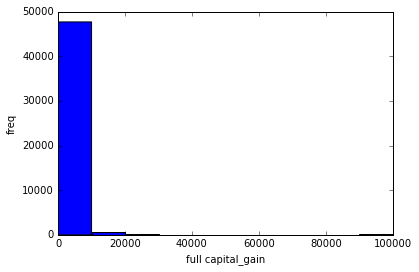

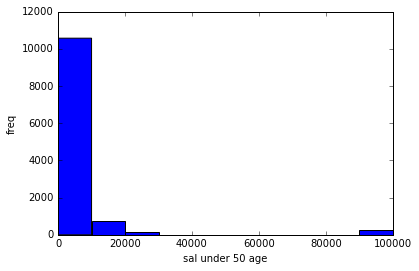

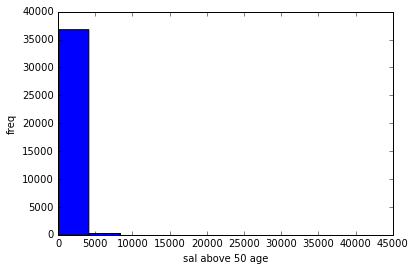

In [110]:
plt.hist(df['capital_gain'])
plt.xlabel('full capital_gain')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == True]['capital_gain'])
plt.xlabel('sal under 50 age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == False]['capital_gain'])
plt.xlabel('sal above 50 age')
plt.ylabel('freq')
plt.show()

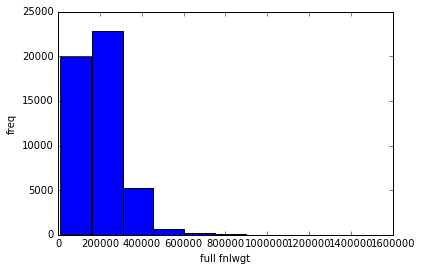

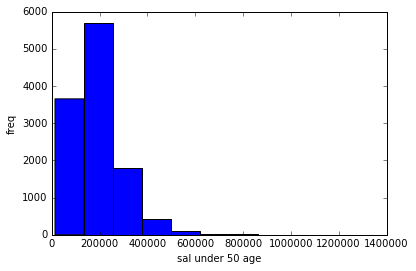

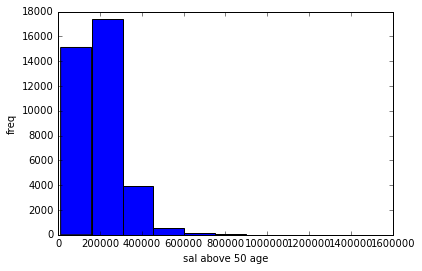

In [109]:
plt.hist(df['fnlwgt'])
plt.xlabel('full fnlwgt')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == True]['fnlwgt'])
plt.xlabel('sal under 50 age')
plt.ylabel('freq')
plt.show()

plt.hist(df[df['target'] == False]['fnlwgt'])
plt.xlabel('sal above 50 age')
plt.ylabel('freq')
plt.show()

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [152]:
df_w_dums = pd.get_dummies(df)
df_w_dums.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  target  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0  False                    0.0                  0.0                     0.0   
1  False                    0.0                  0.0                     0.0   
2  False                    0.0                  0.0                     0.0   
3  False                    0.0                  0.0                     0.0   
4  False                    0.0                  0.0                     0.0   

      ...       native_country_Scotland  native_country_South  \
0     ...                           0.0                   0.0   
1     ...                           0.0                   0.0   
2     ...                           0.0                   0.0   
3     ...                           0.0                   0.0   
4     ...                           0.0                   0.0   

   native_country_Taiwan  native_country_Thailand  \
0                    0.0                      0.0   
1                    0.0                      0.0   
2                    0.0                      0.0   
3                    0.0                      0.0   
4                    0.0                      0.0   

   native_country_Trinadad&Tobago  native_country_United-States  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           1.0   
3                             0.0                           1.0   
4                             0.0                           0.0   

   native_country_Vietnam  native_country_Yugoslavia  salary_<=50K  \
0                     0.0                        0.0           1.0   
1                     0.0                        0.0           1.0   
2                     0.0                        0.0           1.0   
3                     0.0                        0.0           1.0   
4                     0.0                        0.0           1.0   

   salary_>50K  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 108 columns]

## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [126]:
import sklearn as sk
from sklearn import preprocessing

In [164]:
scaler = preprocessing.StandardScaler().fit(df_w_dums['age'])
df_w_dums['age'] = scaler.transform(df_w_dums['age'])

scaler = preprocessing.StandardScaler().fit(df_w_dums['fnlwgt'])
df_w_dums['fnlwgt'] = scaler.transform(df_w_dums['fnlwgt'])

scaler = preprocessing.StandardScaler().fit(df_w_dums['education_num'])
df_w_dums['education_num'] = scaler.transform(df_w_dums['education_num'])

scaler = preprocessing.StandardScaler().fit(df_w_dums['capital_gain'])
df_w_dums['capital_gain'] = scaler.transform(df_w_dums['capital_gain'])

scaler = preprocessing.StandardScaler().fit(df_w_dums['capital_loss'])
df_w_dums['capital_loss'] = scaler.transform(df_w_dums['capital_loss'])

scaler = preprocessing.StandardScaler().fit(df_w_dums['hours_per_week'])
df_w_dums['hours_per_week'] = scaler.transform(df_w_dums['hours_per_week'])
df_w_dums.head()

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.025996 -1.061979       1.136512      0.146932     -0.217127   
1  0.828308 -1.007104       1.136512     -0.144804     -0.217127   
2 -0.046942  0.246034      -0.419335     -0.144804     -0.217127   
3  1.047121  0.426663      -1.197259     -0.144804     -0.217127   
4 -0.776316  1.408530       1.136512     -0.144804     -0.217127   

   hours_per_week target  workclass_Federal-gov  workclass_Local-gov  \
0       -0.034087  False                    0.0                  0.0   
1       -2.213032  False                    0.0                  0.0   
2       -0.034087  False                    0.0                  0.0   
3       -0.034087  False                    0.0                  0.0   
4       -0.034087  False                    0.0                  0.0   

   workclass_Never-worked     ...       native_country_Scotland  \
0                     0.0     ...                           0.0   
1                     0.0     ...                           0.0   
2                     0.0     ...                           0.0   
3                     0.0     ...                           0.0   
4                     0.0     ...                           0.0   

   native_country_South  native_country_Taiwan  native_country_Thailand  \
0                   0.0                    0.0                      0.0   
1                   0.0                    0.0                      0.0   
2                   0.0                    0.0                      0.0   
3                   0.0                    0.0                      0.0   
4                   0.0                    0.0                      0.0   

   native_country_Trinadad&Tobago  native_country_United-States  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           1.0   
3                             0.0                           1.0   
4                             0.0                           0.0   

   native_country_Vietnam  native_country_Yugoslavia  salary_<=50K  \
0                     0.0                        0.0           1.0   
1                     0.0                        0.0           1.0   
2                     0.0                        0.0           1.0   
3                     0.0                        0.0           1.0   
4                     0.0                        0.0           1.0   

   salary_>50K  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 108 columns]

## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [176]:
df_x = df_w_dums.drop(['salary_>50K', 'salary_<=50K', 'target'], axis=1)
X = df_x
y = df_w_dums['target']
y.value_counts()
print 'The baseline is', 37155 / (37155.0 + 11687)

The baseline is 0.760718234307


## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [184]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [189]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

from sklearn import cross_validation

knn.fit(X_train, y_train)
        
acc = knn.score(X_test, y_test)
acc

0.8308102742275717

In [190]:
knn = KNeighborsClassifier(n_neighbors=4,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

from sklearn import cross_validation

knn.fit(X_train, y_train)
        
acc = knn.score(X_test, y_test)
acc

0.82876287380568314

In [191]:
knn = KNeighborsClassifier(n_neighbors=6,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

from sklearn import cross_validation

knn.fit(X_train, y_train)
        
acc = knn.score(X_test, y_test)
acc

0.83614592381188735

In [192]:
knn = KNeighborsClassifier(n_neighbors=8,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

from sklearn import cross_validation

knn.fit(X_train, y_train)
        
acc = knn.score(X_test, y_test)
acc

0.83676634818215656